<a href="https://colab.research.google.com/github/Barbs0207/ArrecadacaoFiscal/blob/main/ArrecadacaoFiscal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agora com o nome certo do arquivo
df = pd.read_csv("/content/arrecadacao-estado.csv", encoding='ISO-8859-1', sep=';', engine='python')

# Converter colunas para números
colunas_convertidas = [
    'IMPOSTO SOBRE IMPORTAÇÃO', 'CPMF', 'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS', 'IRPJ - DEMAIS EMPRESAS',
    'COFINS', 'COFINS - FINANCEIRAS', 'COFINS - DEMAIS', 'IPI - AUTOMÓVEIS', 'IPI - FUMO', 'IPI - BEBIDAS',
    'IPI - VINCULADO À IMPORTACAO', 'IPI - OUTROS', 'IMPOSTO SOBRE EXPORTAÇÃO', 'CSLL', 'CSLL - FINANCEIRAS',
    'CSLL - DEMAIS', 'CONTRIBUIÇÃO PARA O PIS/PASEP', 'IMPOSTO S/ OPERAÇÕES FINANCEIRAS', 'RECEITA PREVIDENCIÁRIA'
]
for col in colunas_convertidas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Conferir se carregou
df.head()




,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,...,REFIS,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS
0,2000.0,Janeiro,AC,231.0,0.0,292096.0,0.0,0.0,167.0,1558.0,...,NaN,NaN,NaN,NaN,20911,NaN,NaN,NaN,NaN,NaN
1,2000.0,Janeiro,AL,475088.0,33873.0,1329338.0,812470.0,0.0,141735.0,3676847.0,...,NaN,NaN,NaN,NaN,127189,NaN,NaN,NaN,NaN,NaN
2,2000.0,Janeiro,AM,11679405.0,0.0,1507146.0,1791471.0,27796.0,4414483.0,1800346.0,...,NaN,NaN,NaN,NaN,187988,NaN,NaN,NaN,NaN,NaN
3,2000.0,Janeiro,AP,24267.0,0.0,424862.0,1419.0,321.0,22333.0,12165.0,...,NaN,NaN,NaN,NaN,10769,NaN,NaN,NaN,NaN,NaN
4,2000.0,Janeiro,BA,10476457.0,13.0,5542123.0,11533707.0,0.0,7496476.0,23743858.0,...,NaN,NaN,NaN,NaN,536498,NaN,NaN,NaN,NaN,NaN


Estado que mais arrecadou com CPMF (1994–2007):
UF
SP    1.008860e+11
Name: CPMF, dtype: float64


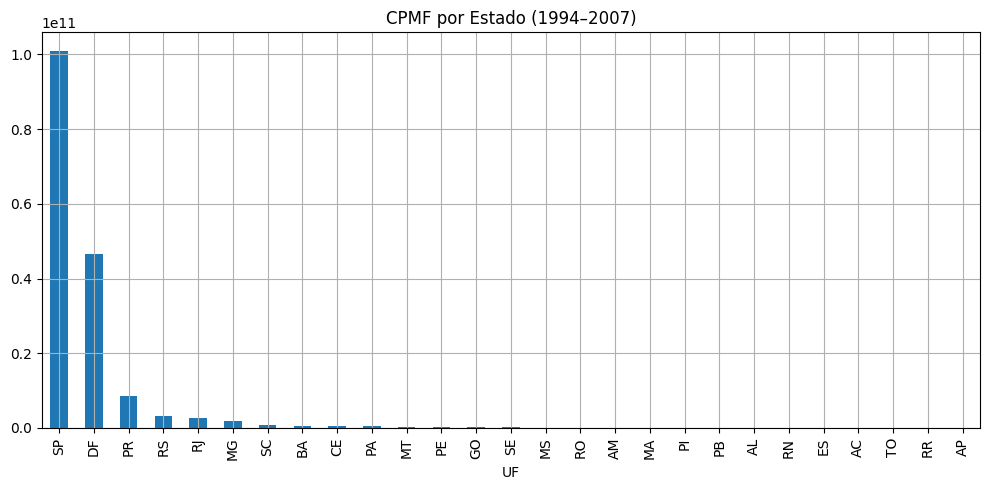

In [ ]:
# 2. Estado que mais arrecadou com CPMF (1994–2007)
df_cpmf = df[(df['Ano'] >= 1994) & (df['Ano'] <= 2007)]
cpmf_por_estado = df_cpmf.groupby('UF')['CPMF'].sum().sort_values(ascending=False)

print("Estado que mais arrecadou com CPMF (1994–2007):")
print(cpmf_por_estado.head(1))

cpmf_por_estado.plot(kind='bar', figsize=(10, 5), title='CPMF por Estado (1994–2007)')
plt.grid(True)
plt.tight_layout()
plt.show()

Ano com maior arrecadação de IRPF em SP: 2024.0
Valor arrecadado: R$ 26,251,559,092.00


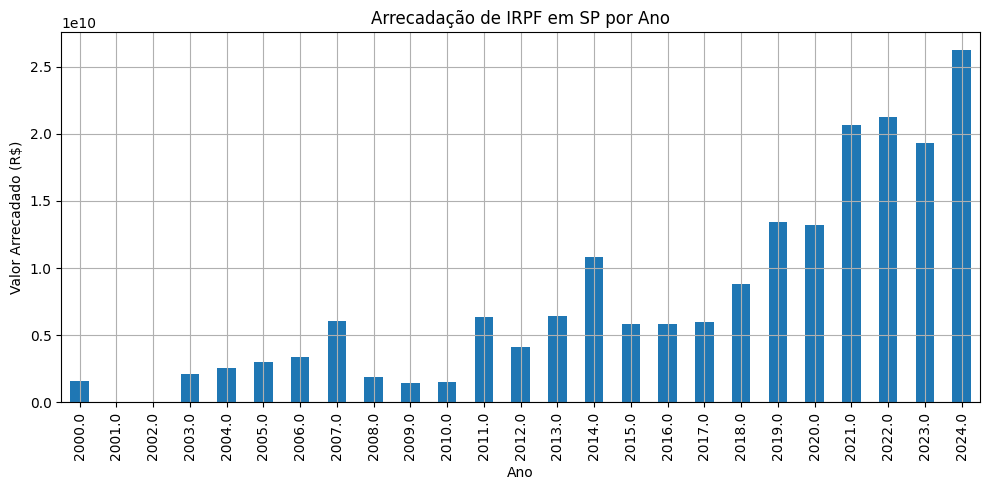

In [ ]:
# 3. Ano de maior arrecadação de IRPF em São Paulo
df_sp_irpf = df[df['UF'] == 'SP']
irpf_por_ano = df_sp_irpf.groupby('Ano')['IRPF'].sum()
ano_maior_irpf = irpf_por_ano.idxmax()
valor_maior_irpf = irpf_por_ano.max()

print(f"Ano com maior arrecadação de IRPF em SP: {ano_maior_irpf}")
print(f"Valor arrecadado: R$ {valor_maior_irpf:,.2f}")

irpf_por_ano.plot(kind='bar', figsize=(10, 5), title='Arrecadação de IRPF em SP por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Arrecadado (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


COFINS - Financeiras (2023): R$ 14329849994.0
COFINS - Demais Empresas (2023): R$ 249505885699.0


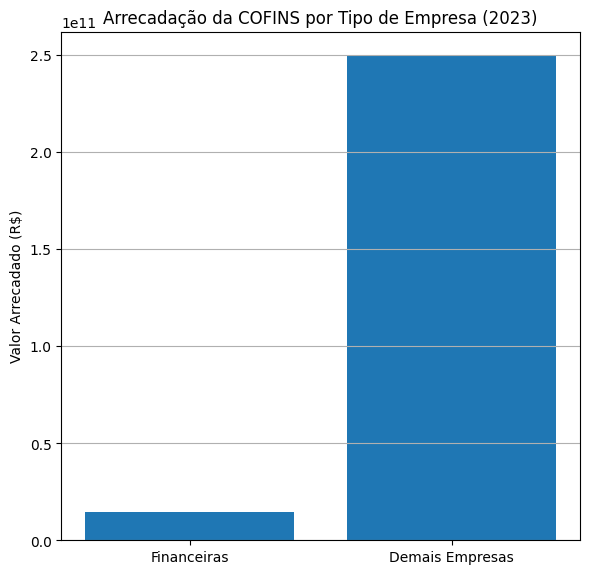

In [ ]:
# 4. Participação da COFINS em 2023 - Financeiras vs Demais Empresas
df_2023 = df[df['Ano'] == 2023]

cf_fin = df_2023['COFINS - FINANCEIRAS'].sum()
cf_dem = df_2023['COFINS - DEMAIS'].sum()

print("COFINS - Financeiras (2023): R$", cf_fin)
print("COFINS - Demais Empresas (2023): R$", cf_dem)

plt.figure(figsize=(6, 6))
plt.bar(['Financeiras', 'Demais Empresas'], [cf_fin, cf_dem])
plt.title('Arrecadação da COFINS por Tipo de Empresa (2023)')
plt.ylabel('Valor Arrecadado (R$)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Exportação MT e GO (2000–2024):
UF             GO         MT
Ano                         
2000.0    20239.0     9412.0
2001.0  3528560.0  1530632.0
2002.0        0.0        0.0
2003.0  3881638.0  2585925.0
2004.0     3148.0      337.0
2005.0    24322.0   687446.0
2006.0    19147.0    16729.0
2007.0    86811.0     8823.0
2008.0        0.0        0.0
2009.0        0.0        0.0
2010.0        0.0        0.0
2011.0      464.0      256.0
2012.0        0.0        0.0
2013.0    93325.0    79716.0
2014.0   313204.0   393652.0
2015.0   224837.0    94125.0
2016.0        0.0      -23.0
2017.0        0.0        0.0
2018.0        0.0        0.0
2019.0        0.0     5479.0
2020.0        0.0        0.0
2021.0        0.0        0.0
2022.0        0.0        0.0
2023.0        0.0        0.0
2024.0        0.0        0.0


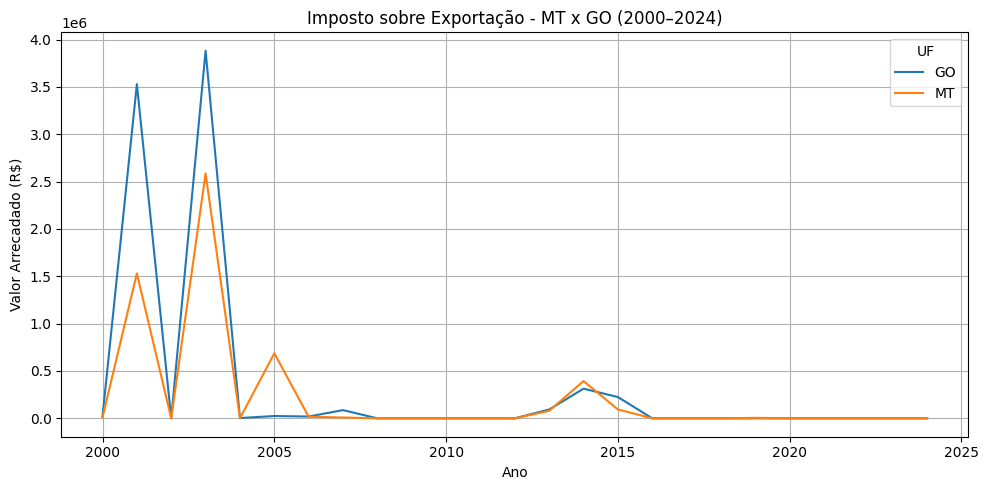

In [ ]:
# 5. Imposto sobre Exportação em MT e GO (2000–2024)
df_mtgo = df[(df['UF'].isin(['MT', 'GO'])) & (df['Ano'] >= 2000) & (df['Ano'] <= 2024)]
export_serie = df_mtgo.groupby(['Ano', 'UF'])['IMPOSTO SOBRE EXPORTAÇÃO'].sum().unstack()

print("Exportação MT e GO (2000–2024):")
print(export_serie)

export_serie.plot(figsize=(10, 5), title='Imposto sobre Exportação - MT x GO (2000–2024)')
plt.xlabel('Ano')
plt.ylabel('Valor Arrecadado (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


Top 5 estados com maior arrecadação de IPI sobre Automóveis em 2022:
UF
PA    75215.0
AM    48405.0
RR    12955.0
DF       10.0
AP        0.0
Name: IPI - AUTOMÓVEIS, dtype: float64


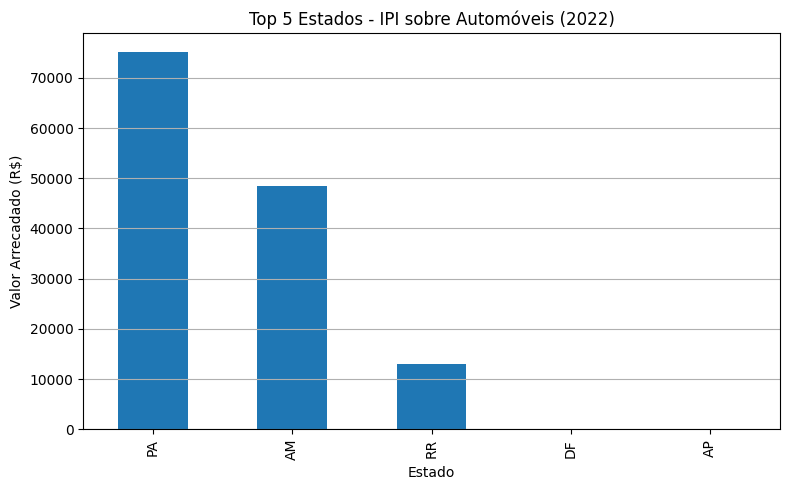

In [ ]:
# 6. Arrecadação de IPI sobre Automóveis - Top 5 estados em 2022
df_2022 = df[df['Ano'] == 2022]
ipi_auto_2022 = df_2022.groupby('UF')['IPI - AUTOMÓVEIS'].sum().sort_values(ascending=False).head(5)

print("Top 5 estados com maior arrecadação de IPI sobre Automóveis em 2022:")
print(ipi_auto_2022)

ipi_auto_2022.plot(kind='bar', figsize=(8, 5), title='Top 5 Estados - IPI sobre Automóveis (2022)')
plt.xlabel('Estado')
plt.ylabel('Valor Arrecadado (R$)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Evolução do IRPJ em SP (2000–2023):
        IRPJ - ENTIDADES FINANCEIRAS  IRPJ - DEMAIS EMPRESAS
Ano                                                         
2000.0                  1.536784e+09            7.002015e+09
2001.0                  0.000000e+00            0.000000e+00
2002.0                  0.000000e+00            0.000000e+00
2003.0                  3.223902e+09            9.239704e+09
2004.0                  3.842553e+09            1.238934e+10
2005.0                  4.333798e+09            1.572280e+10
2006.0                  4.666783e+09            1.802536e+10
2007.0                  8.252092e+09            2.258432e+10
2008.0                  3.974030e+09            2.922796e+10
2009.0                  2.341216e+09            2.794602e+10
2010.0                  1.014137e+09            3.130258e+10
2011.0                  4.164825e+09            3.536884e+10
2012.0                  7.026801e+09            3.612270e+10
2013.0                  8.602499e+09            4

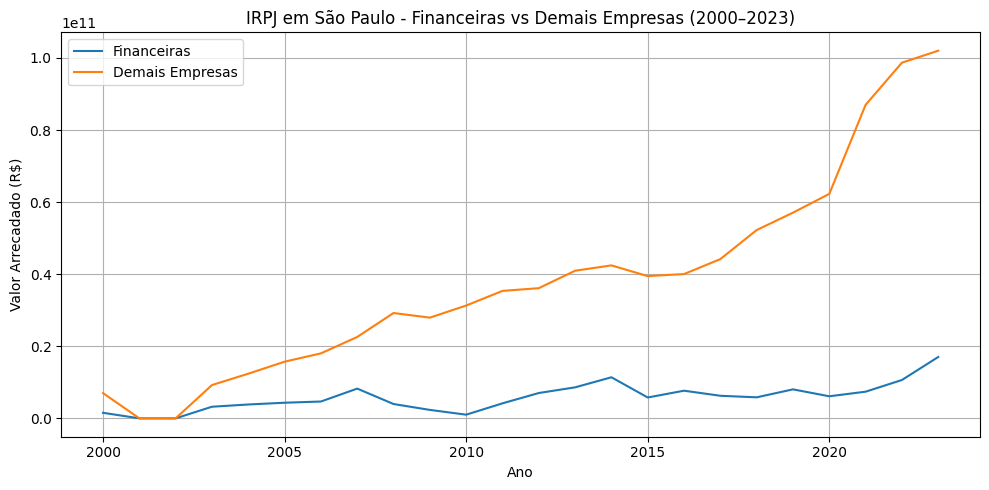

In [ ]:
# 7. Evolução do IRPJ em SP - Financeiras vs Demais Empresas (2000–2023)
df_irpj_sp = df[(df['UF'] == 'SP') & (df['Ano'] >= 2000) & (df['Ano'] <= 2023)]
irpj_evolucao = df_irpj_sp.groupby('Ano')[['IRPJ - ENTIDADES FINANCEIRAS', 'IRPJ - DEMAIS EMPRESAS']].sum()

print("Evolução do IRPJ em SP (2000–2023):")
print(irpj_evolucao)

plt.figure(figsize=(10, 5))
plt.plot(irpj_evolucao.index, irpj_evolucao['IRPJ - ENTIDADES FINANCEIRAS'], label='Financeiras')
plt.plot(irpj_evolucao.index, irpj_evolucao['IRPJ - DEMAIS EMPRESAS'], label='Demais Empresas')
plt.title('IRPJ em São Paulo - Financeiras vs Demais Empresas (2000–2023)')
plt.xlabel('Ano')
plt.ylabel('Valor Arrecadado (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Estado com maior arrecadação de IPI (2000–2024): SP
Total arrecadado: R$ 220,559,704,611.00

Composição por tipo de IPI:
IPI - OUTROS                    1.505941e+11
IPI - VINCULADO À IMPORTACAO    4.329796e+10
IPI - AUTOMÓVEIS                1.579890e+10
IPI - BEBIDAS                   6.455379e+09
IPI - FUMO                      4.413367e+09
dtype: float64


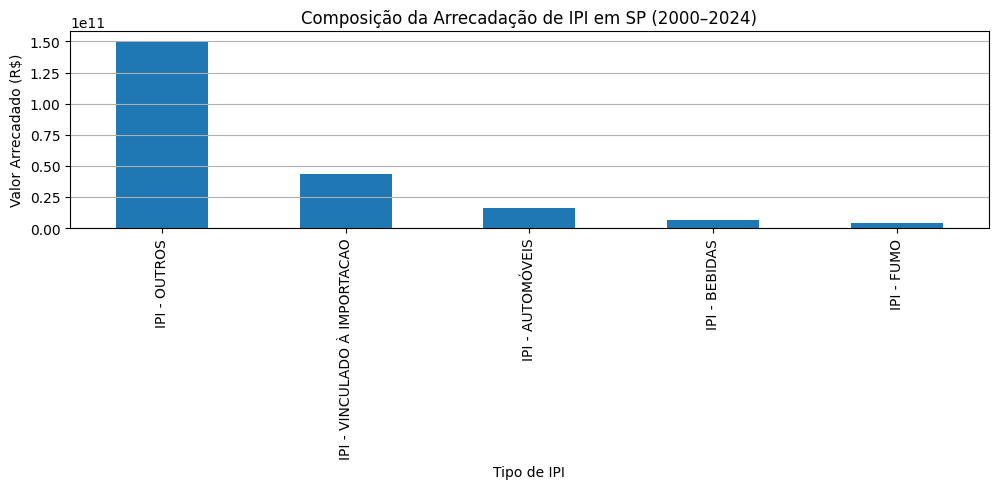

In [ ]:
# 8. Estado com maior arrecadação de IPI (2000–2024) e detalhamento por tipo
ipi_cols = ['IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS', 'IPI - VINCULADO À IMPORTACAO', 'IPI - OUTROS']
df['TOTAL_IPI'] = df[ipi_cols].sum(axis=1)

ipi_por_estado = df[(df['Ano'] >= 2000) & (df['Ano'] <= 2024)].groupby('UF')['TOTAL_IPI'].sum().sort_values(ascending=False)
estado_top_ipi = ipi_por_estado.idxmax()
df_estado_top = df[df['UF'] == estado_top_ipi]
ipi_tipos_estado_top = df_estado_top[ipi_cols].sum().sort_values(ascending=False)

print(f"Estado com maior arrecadação de IPI (2000–2024): {estado_top_ipi}")
print(f"Total arrecadado: R$ {ipi_por_estado[estado_top_ipi]:,.2f}")
print("\nComposição por tipo de IPI:")
print(ipi_tipos_estado_top)

plt.figure(figsize=(10, 5))
ipi_tipos_estado_top.plot(kind='bar')
plt.title(f'Composição da Arrecadação de IPI em {estado_top_ipi} (2000–2024)')
plt.xlabel('Tipo de IPI')
plt.ylabel('Valor Arrecadado (R$)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Evolução da arrecadação da CSLL (2000–2023):
        CSLL - FINANCEIRAS  CSLL - DEMAIS
Ano                                      
2000.0        0.000000e+00   0.000000e+00
2001.0        0.000000e+00   0.000000e+00
2002.0        0.000000e+00   0.000000e+00
2003.0        0.000000e+00   0.000000e+00
2004.0        2.134063e+09   1.742000e+10
2005.0        2.525484e+09   2.379716e+10
2006.0        2.946954e+09   2.512365e+10
2007.0        4.765041e+09   2.964601e+10
2008.0        4.301273e+08   1.732386e+10
2009.0        1.432547e+09   1.245153e+10
2010.0        1.429874e+09   1.369347e+10
2011.0        1.902653e+09   3.086060e+10
2012.0        3.424084e+09   1.832228e+10
2013.0        6.561558e+09   3.615099e+10
2014.0        1.057215e+10   5.496150e+10
2015.0        6.641729e+09   3.766670e+10
2016.0        7.288544e+09   2.512937e+10
2017.0        6.417576e+09   2.678602e+10
2018.0        5.199341e+09   3.443446e+10
2019.0        4.573395e+09   4.158345e+10
2020.0        5.431833e+09   4.

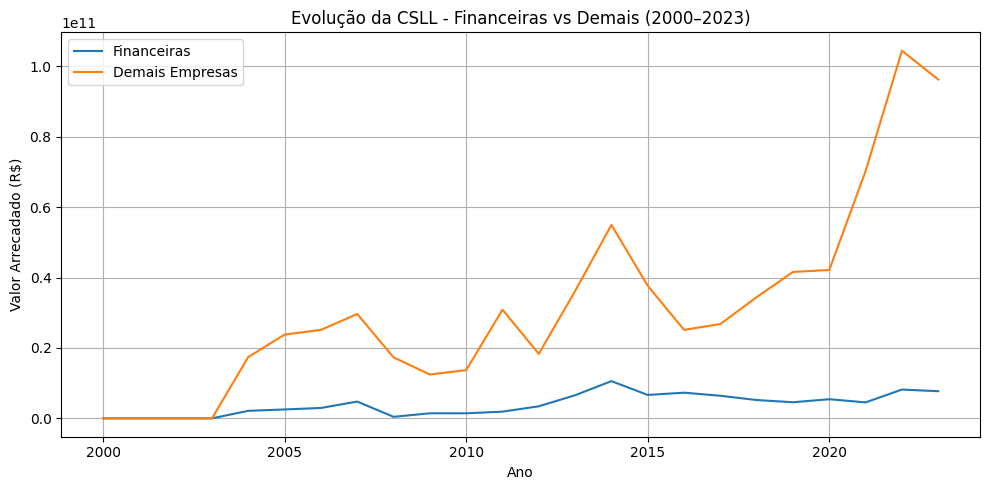

In [ ]:
# 9. Evolução da arrecadação da CSLL (2000–2023)
df_csll = df[(df['Ano'] >= 2000) & (df['Ano'] <= 2023)]
csll_evolucao = df_csll.groupby('Ano')[['CSLL - FINANCEIRAS', 'CSLL - DEMAIS']].sum()

print("Evolução da arrecadação da CSLL (2000–2023):")
print(csll_evolucao)

plt.figure(figsize=(10, 5))
plt.plot(csll_evolucao.index, csll_evolucao['CSLL - FINANCEIRAS'], label='Financeiras')
plt.plot(csll_evolucao.index, csll_evolucao['CSLL - DEMAIS'], label='Demais Empresas')
plt.title('Evolução da CSLL - Financeiras vs Demais (2000–2023)')
plt.xlabel('Ano')
plt.ylabel('Valor Arrecadado (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Crescimento percentual de arrecadação (2008–2023):
RECEITA PREVIDENCIÁRIA                      inf
IRPF                                1276.964869
IRPJ - DEMAIS EMPRESAS               338.349210
IRPJ - ENTIDADES FINANCEIRAS         302.807389
IMPOSTO S/ OPERAÇÕES FINANCEIRAS     228.640445
COFINS                                      NaN
CSLL                                        NaN
CONTRIBUIÇÃO PARA O PIS/PASEP               NaN
dtype: float64


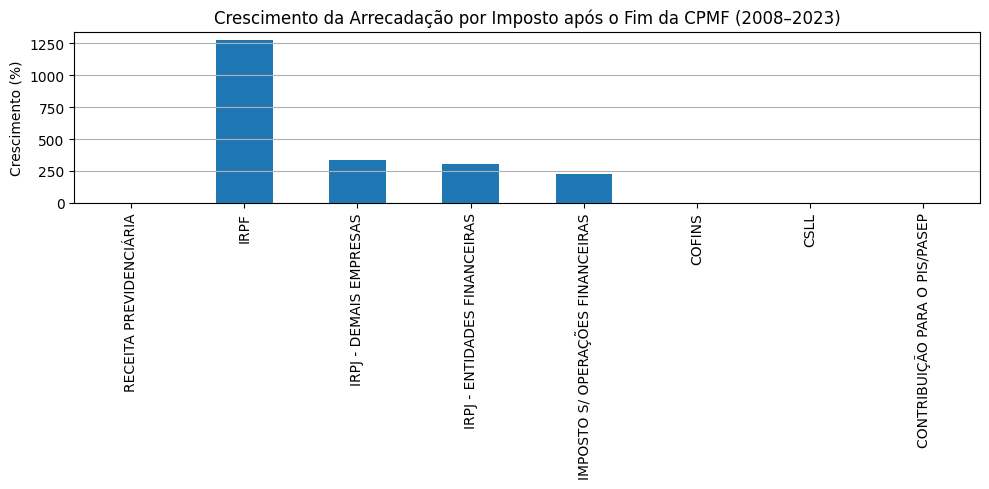

In [ ]:
# 10. Imposto que mais cresceu após o fim da CPMF (2007)
df_pos_cpmf = df[df['Ano'] > 2007]

# Lista de colunas tributárias relevantes
colunas_impostos = [
    'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS', 'IRPJ - DEMAIS EMPRESAS', 'COFINS', 'CSLL', 'CONTRIBUIÇÃO PARA O PIS/PASEP',
    'IMPOSTO S/ OPERAÇÕES FINANCEIRAS', 'RECEITA PREVIDENCIÁRIA'
]

# Soma por ano
crescimento = df_pos_cpmf.groupby('Ano')[colunas_impostos].sum()

# Cálculo da variação percentual de 2008 até 2023
crescimento_pct = ((crescimento.loc[2023] - crescimento.loc[2008]) / crescimento.loc[2008]) * 100
crescimento_pct = crescimento_pct.sort_values(ascending=False)

print("Crescimento percentual de arrecadação (2008–2023):")
print(crescimento_pct)

# Gráfico de barras com crescimento percentual
plt.figure(figsize=(10, 5))
crescimento_pct.plot(kind='bar')
plt.title('Crescimento da Arrecadação por Imposto após o Fim da CPMF (2008–2023)')
plt.ylabel('Crescimento (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def responder_pergunta(pergunta, df):
    pergunta = pergunta.lower()

    if "irpf" in pergunta and "são paulo" in pergunta:
        df_sp = df[df['UF'] == 'SP']
        irpf_ano = df_sp.groupby('Ano')['IRPF'].sum()
        ano_top = irpf_ano.idxmax()
        valor = irpf_ano.max()
        print(f"Maior arrecadação de IRPF em SP foi em {ano_top} no valor de R$ {valor:,.2f}")
        irpf_ano.plot(kind='bar', figsize=(10,5), title="IRPF em SP por ano")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    elif "cpfm" in pergunta or "cpmf" in pergunta:
        df_cpmf = df[(df['Ano'] >= 1994) & (df['Ano'] <= 2007)]
        cpmf_estado = df_cpmf.groupby('UF')['CPMF'].sum().sort_values(ascending=False)
        print(f"Estado que mais arrecadou com CPMF: {cpmf_estado.idxmax()} - R$ {cpmf_estado.max():,.2f}")
        cpmf_estado.plot(kind='bar', figsize=(10, 5), title='CPMF por Estado (1994–2007)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    elif "ipi" in pergunta and "automóveis" in pergunta:
        df_2022 = df[df['Ano'] == 2022]
        ipi_auto = df_2022.groupby('UF')['IPI - AUTOMÓVEIS'].sum().sort_values(ascending=False).head(5)
        print("Top 5 estados com maior arrecadação de IPI sobre Automóveis em 2022:")
        print(ipi_auto)
        ipi_auto.plot(kind='bar', figsize=(8, 5), title='Top 5 Estados - IPI sobre Automóveis (2022)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    elif "csll" in pergunta and "2023" in pergunta:
        df_2023 = df[df['Ano'] == 2023]
        csll_fin = df_2023['CSLL - FINANCEIRAS'].sum()
        csll_demais = df_2023['CSLL - DEMAIS'].sum()

        print(f"💡 CSLL em 2023:\n- Entidades Financeiras: R$ {csll_fin:,.2f}\n- Demais Empresas: R$ {csll_demais:,.2f}")

        plt.figure(figsize=(6, 5))
        plt.bar(['Financeiras', 'Demais Empresas'], [csll_fin, csll_demais])
        plt.title('Arrecadação de CSLL por Tipo de Empresa (2023)')
        plt.ylabel('Valor Arrecadado (R$)')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()


    else:

        print("Desculpa,... ainda não aprendi a responder essa pergunta ")

# Exemplo de uso:
# responder_pergunta("Me mostra a arrecadação de IRPF em São Paulo", df)


Maior arrecadação de IRPF em SP foi em 2024.0 no valor de R$ 26,251,559,092.00


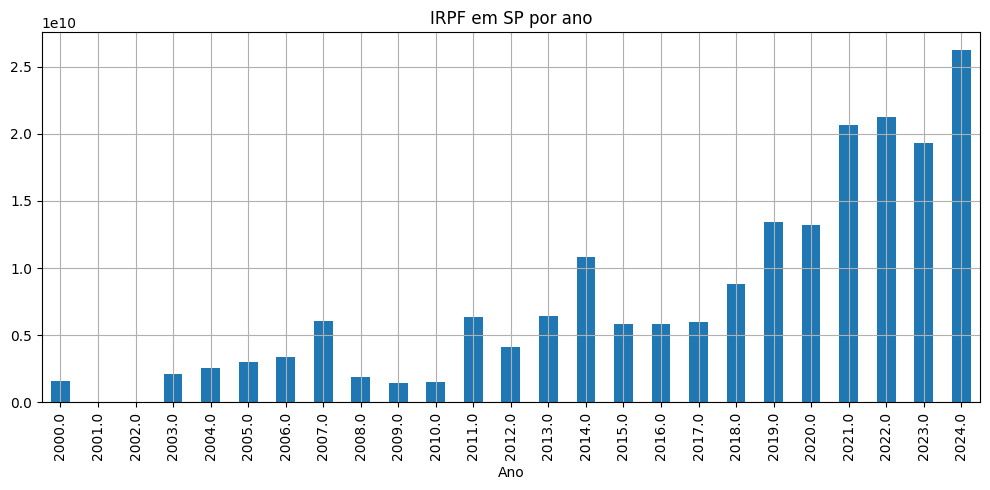

In [ ]:
responder_pergunta("Qual foi a maior arrecadação de IRPF em São Paulo?", df)


Text(value='', description='Você:', layout=Layout(width='100%'), placeholder='Digite sua pergunta aqui...', st…


🔹 Pergunta: Me mostra a arrecadação de IRPF em São Paulo", df
Maior arrecadação de IRPF em SP foi em 2024.0 no valor de R$ 26,251,559,092.00


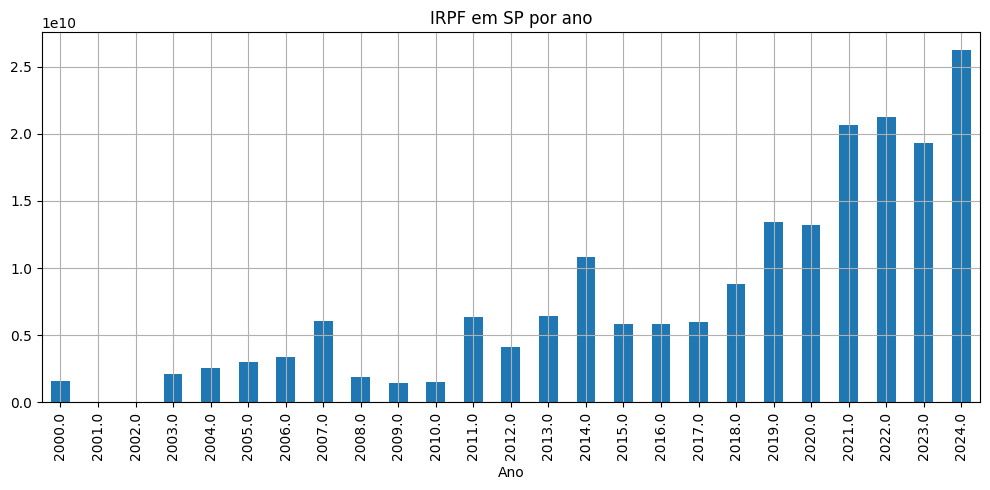


🔹 Pergunta: Imposto que mais cresceu após o fim da CPMF (2007)
Estado que mais arrecadou com CPMF: SP - R$ 100,885,981,307.00


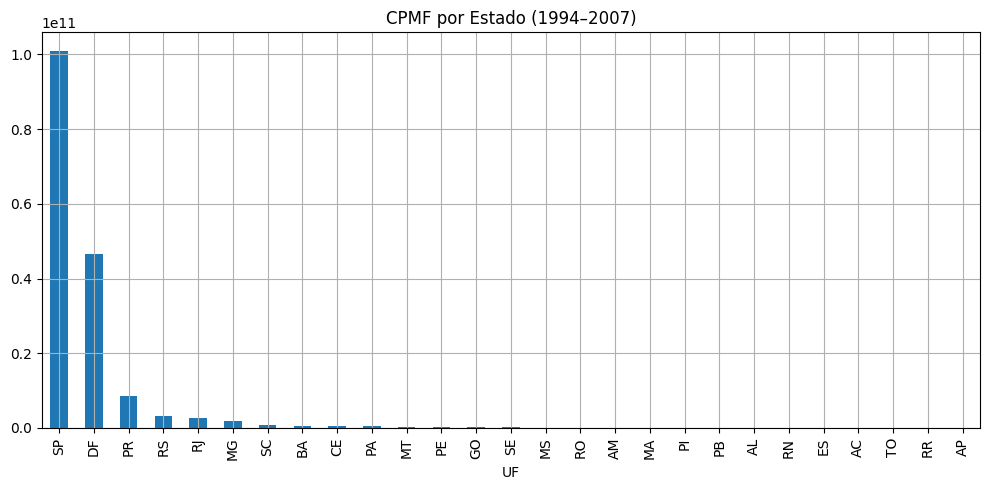

In [ ]:
from IPython.display import display
import ipywidgets as widgets

# Criar campo de entrada tipo chat
entrada = widgets.Text(
    value='',
    placeholder='Digite sua pergunta aqui...',
    description='Você:',
    layout=widgets.Layout(width='100%'),
    style={'description_width': '50px'}
)

# Função para responder automaticamente quando o usuário apertar ENTER
def ao_digitar(pergunta):
    texto = pergunta.value
    if texto.strip():
        print(f"\n🔹 Pergunta: {texto}")
        responder_pergunta(texto, df)
    pergunta.value = ''  # Limpa o campo

entrada.on_submit(ao_digitar)

# Exibe o campo de entrada interativo
display(entrada)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Campo de texto
entrada_app = widgets.Text(
    value='',
    placeholder='Digite sua pergunta...',
    description='Você:',
    layout=widgets.Layout(width='80%'),
    style={'description_width': '50px'}
)

# Botão
botao = widgets.Button(
    description='Perguntar',
    button_style='info',
    layout=widgets.Layout(width='20%')
)

# Área de saída da resposta
saida = widgets.Output()

# Ação ao clicar no botão
def ao_clicar_botao(b):
    with saida:
        clear_output()
        print(f"🟦 Sua pergunta: {entrada_app.value}")
        responder_pergunta(entrada_app.value, df)
        entrada_app.value = ''

botao.on_click(ao_clicar_botao)

print("💡 Bem-vinda(o) ao WhisperData: sua IA de análise fiscal entre 2000 e 2024.\nDigite uma pergunta abaixo para começar...")

# Layout lado a lado (campo + botão)
layout = widgets.HBox([entrada_app, botao])

# Exibir o app
display(layout, saida)




💡 Bem-vinda(o) ao WhisperData: sua IA de análise fiscal entre 2000 e 2024.
Digite uma pergunta abaixo para começar...


Output()